# Double Pendulum Simulation - Non-zero mass rods

![](Image_files/Double_Pendulum.png)

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from DoublePendulum_Moments import DoublePendulum, eq1, eq2, eq3, eq4

We derived the equations of motion from first principles in `Derivation_Moment.ipynb`

See [diego.assencio](https://diego.assencio.com/?index=1500c66ae7ab27bb0106467c68feebc6#mjx-eqn-post_1500c66ae7ab27bb0106467c68feebc6_first_order_eq_theta_omega)

In [2]:
LHS = sp.Matrix([[eq1.lhs], [eq2.lhs], [eq3.lhs], [eq4.lhs]])
RHS = sp.Matrix([[eq1.rhs], [eq2.rhs], [eq3.rhs], [eq4.rhs]])
MAT_EQ = sp.Eq(LHS, RHS)
display(MAT_EQ)

Eq(Matrix([
[               omega1(t)],
[               omega2(t)],
[Derivative(omega1(t), t)],
[Derivative(omega2(t), t)]]), Matrix([
[                                                                                                                                                                                                                                                                                                                                                                         Derivative(theta1(t), t)],
[                                                                                                                                                                                                                                                                                                                                                                         Derivative(theta2(t), t)],
[         3*(3*m2*(M2*g*sin(theta2(t)) - 2*g*m2*sin(theta2(t)) + 2*l1*m2*sin(theta1(t) 

----
&nbsp;
#### Set unity parameters for masses such that, 

$$m_1=m_2=1\text{kg}$$
$$M_1=M_2=1\text{kg}$$

#### Let one rod be twice the length;

$$l_1=2\text{m}$$
$$l_2=1\text{m}$$

In [3]:
l1, l2, m1, m2, g, M1, M2 = sp.symbols("l1, l2, m1, m2, g, M1, M2", positive=True, real=True)

# Define parameters
params = {
    m1: 1,     # point mass1
    m2: 1,     # point mass2
    M1: 1,     # mass rod1
    M2: 1,     # mass rod2
    l1: 2,     # length1
    l2: 1,     # length2
    g : 9.81,  # acceleration due to gravity
}

----
&nbsp;
## Double Pendulums

- The `init_values` array specifies the starting angles and angular velocities of the two pendulum arms in degrees. 
- The `time` array defines the simulation's start and end times and the number of points to compute `[start, end, points]`

Allowing $m_1=m_2=M_1=M_2=1\text{kg}$, the motion is considerably more periodic that the zero-mass rod model.
- More initial conditions result in [Lissajous curves](https://en.wikipedia.org/wiki/Lissajous_curve)
- Only large initial angles show chaotic motion 
- $\theta_2$ is bounded $\in [-\pi, \pi]$ for all attempted parameters


Pendulum 1, $\theta_2 = 45 \degree$

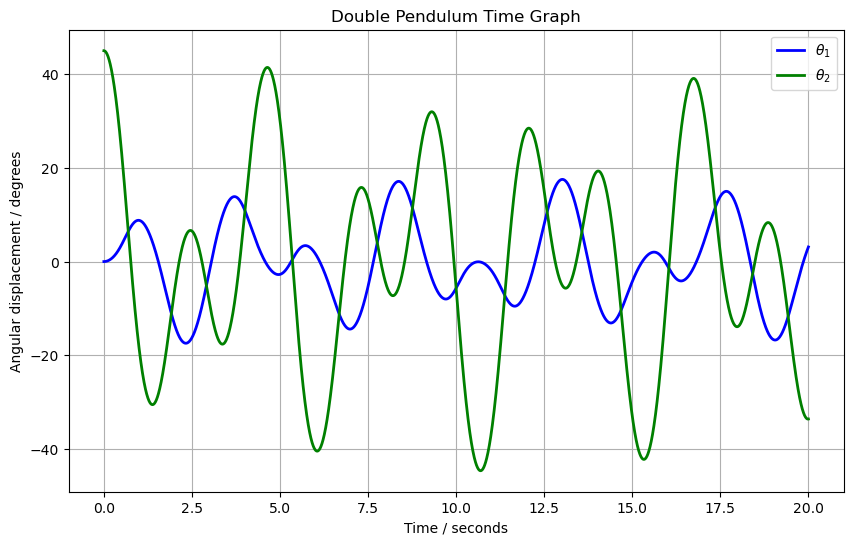

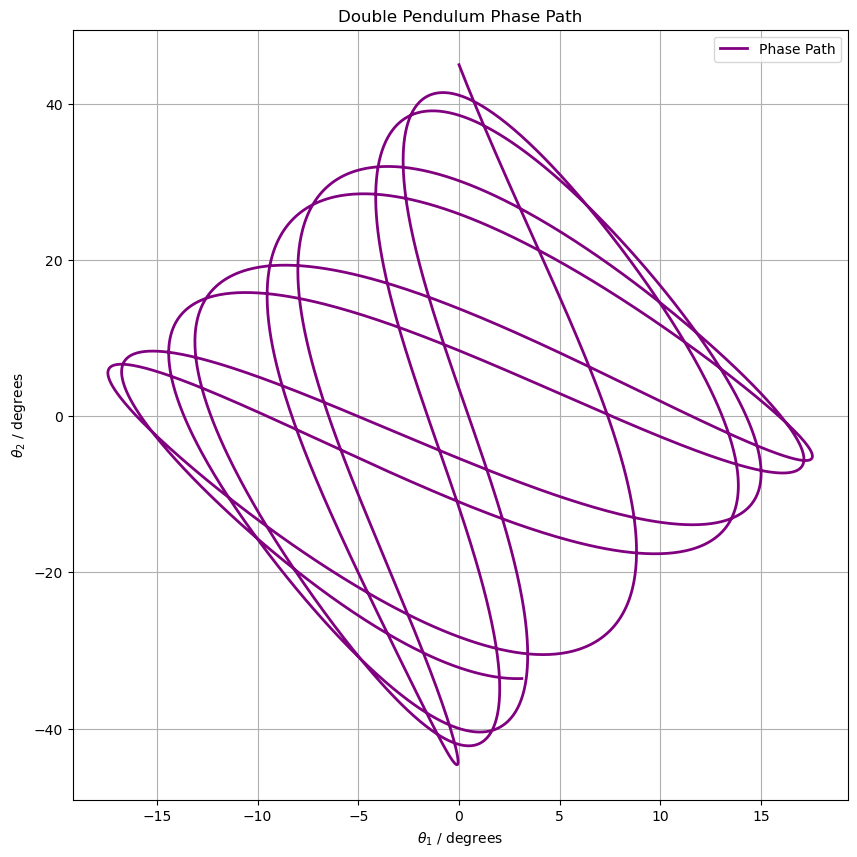

In [4]:
init_values = [0, 45, 0, 0]
time = [0, 20, 4000]
pendulum1 = DoublePendulum(parameters=params, initial_conditions=init_values, time_vector=time)
pendulum1.time_graph()
pendulum1.phase_path()

Calling `fig.show()` produces the below animation

In [6]:
pendulum1.precompute_positions()  # Precompute before the animation
fig = pendulum1.animate_pendulum(trace=True, appearance='dark')
#fig.show()

![img](Image_files/Moment_1.gif)

Pendulum 2, $\theta_1 = 45 \degree$, $\theta_2 = 45 \degree$

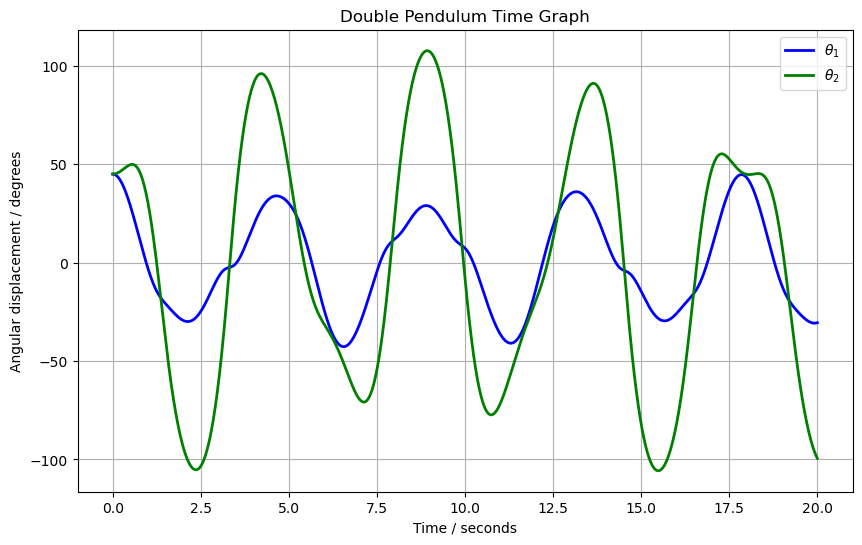

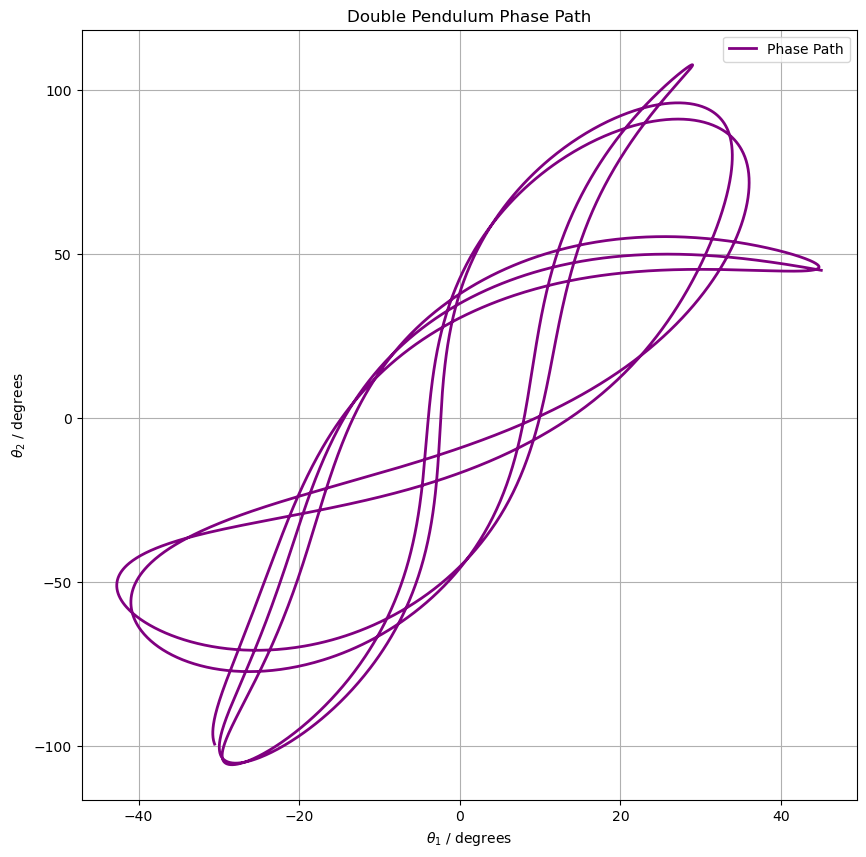

In [6]:
init_values = [45, 45, 0, 0]
time = [0, 20, 4000]
pendulum2 = DoublePendulum(parameters=params, initial_conditions=init_values, time_vector=time)
pendulum2.time_graph()
pendulum2.phase_path()

Pendulum 3, $\theta_1 = 30 \degree$, $\theta_2 = 45 \degree$

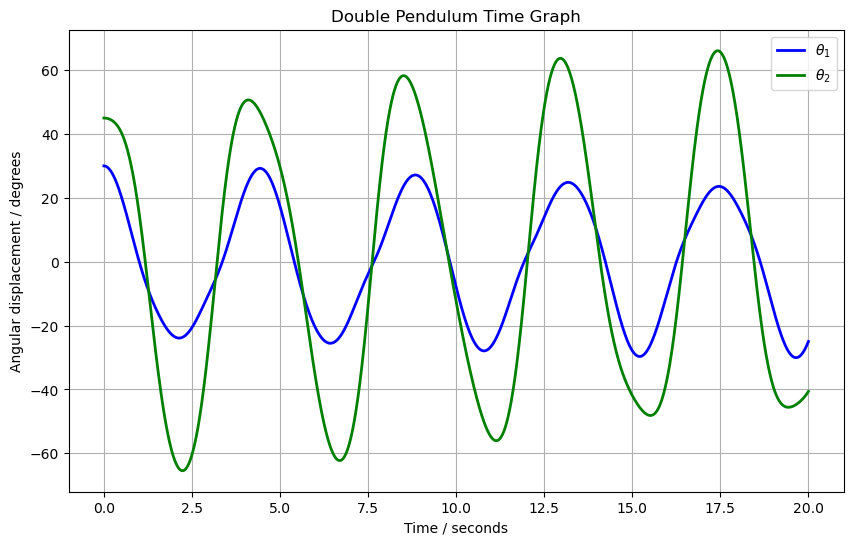

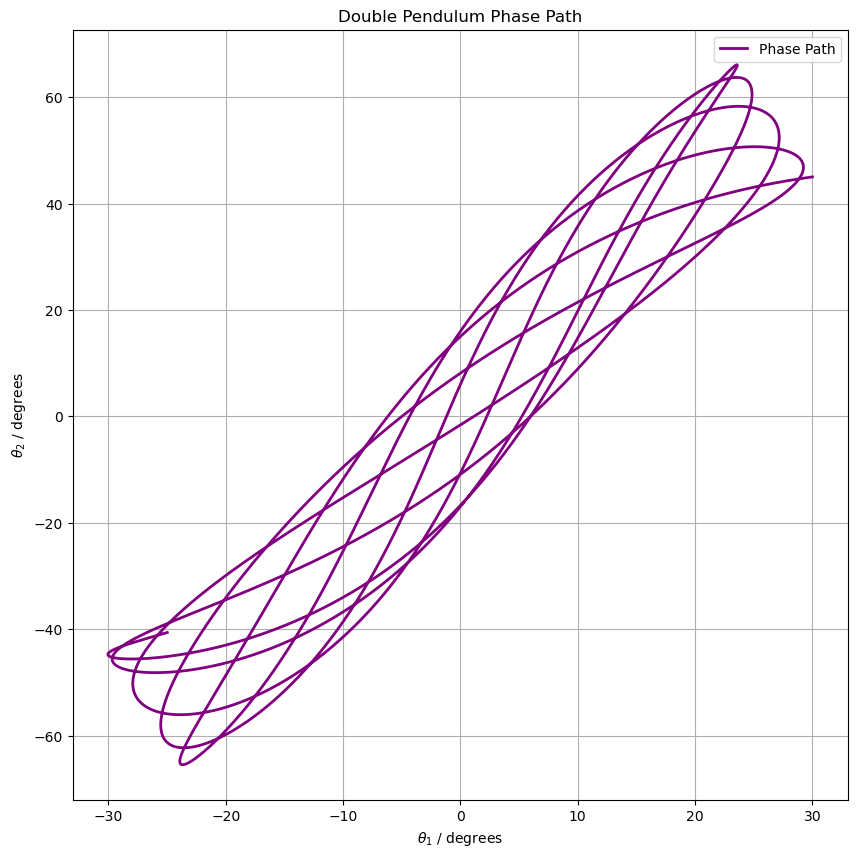

In [7]:
init_values = [30, 45, 0, 0]
time = [0, 20, 4000]
pendulum3 = DoublePendulum(parameters=params, initial_conditions=init_values, time_vector=time)
pendulum3.time_graph()
pendulum3.phase_path()

Pendulum 4, $\theta_1 = 60 \degree$, $\theta_2 = 90 \degree$

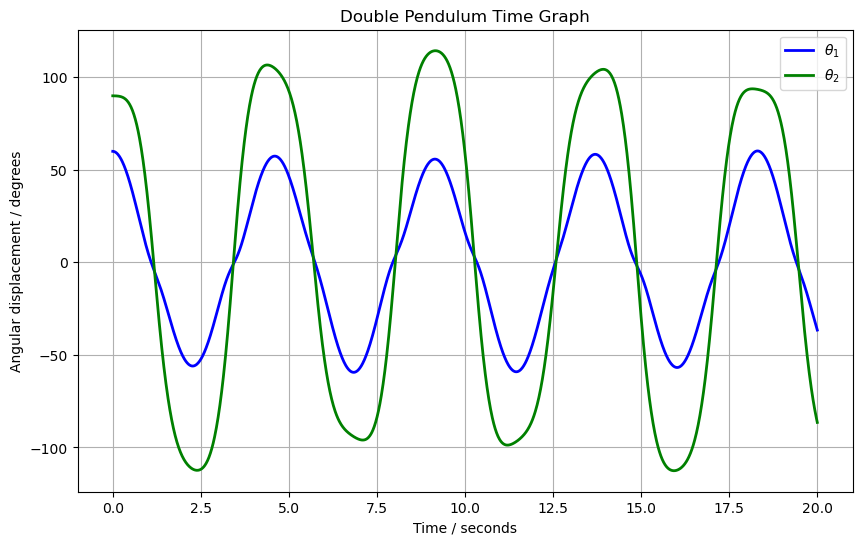

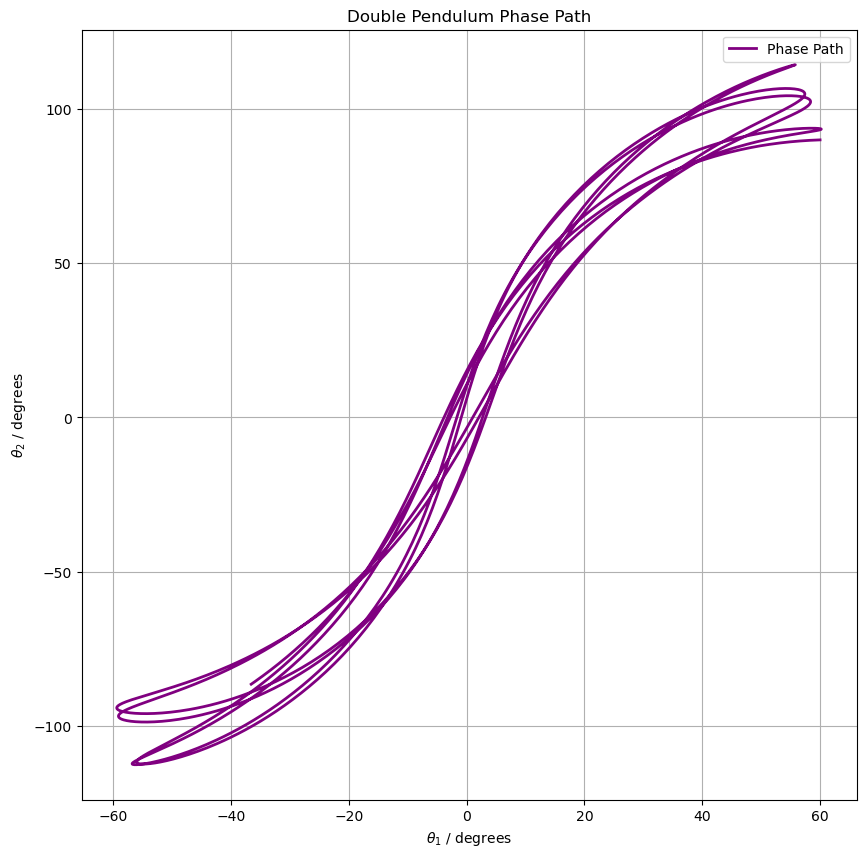

In [8]:
init_values = [60, 90, 0, 0]
time = [0, 20, 2000]
pendulum4 = DoublePendulum(parameters=params, initial_conditions=init_values, time_vector=time)
pendulum4.time_graph()
pendulum4.phase_path()

#### $\theta_1$ is set $1 \degree$ above the above pendulum...

Pendulum 5, $\theta_1 = 60 \degree$, $\theta_2 = 91 \degree$

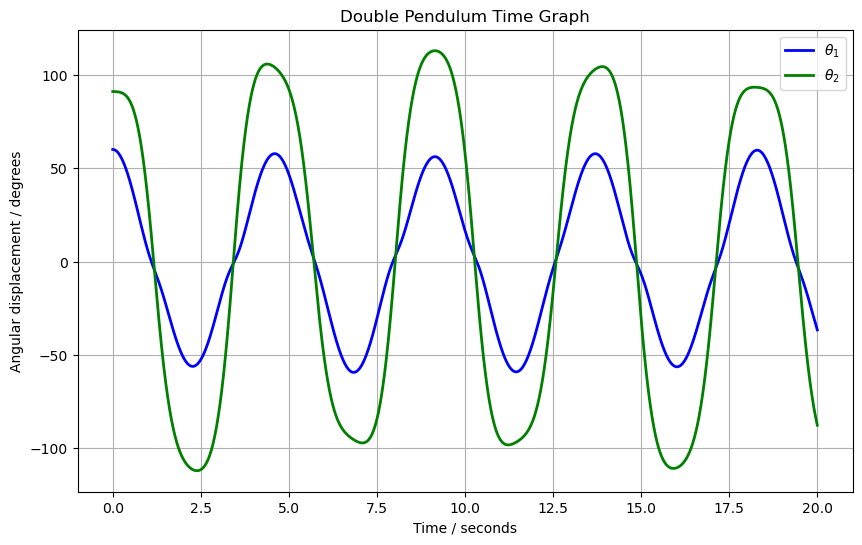

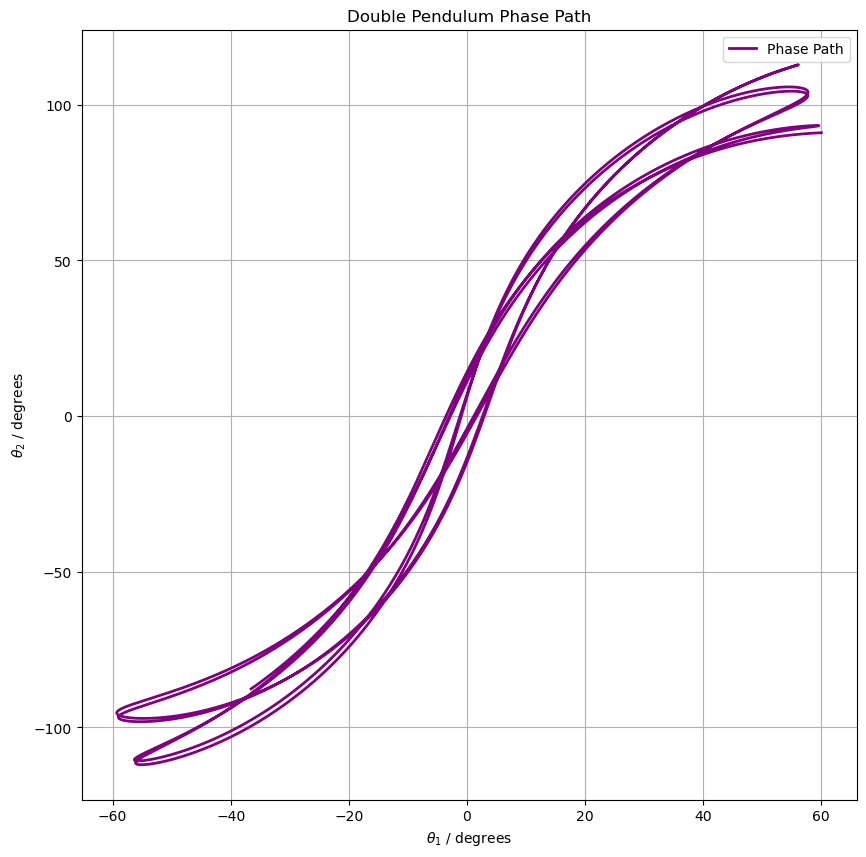

In [9]:
init_values = [60, 91, 0, 0]
time = [0, 20, 4000]
pendulum5 = DoublePendulum(parameters=params, initial_conditions=init_values, time_vector=time)
pendulum5.time_graph()
pendulum5.phase_path()

----
&nbsp;
## Longer time vector

Pendulum 6, $\theta_1 = -105 \degree$, $\theta_2 = 105 \degree$

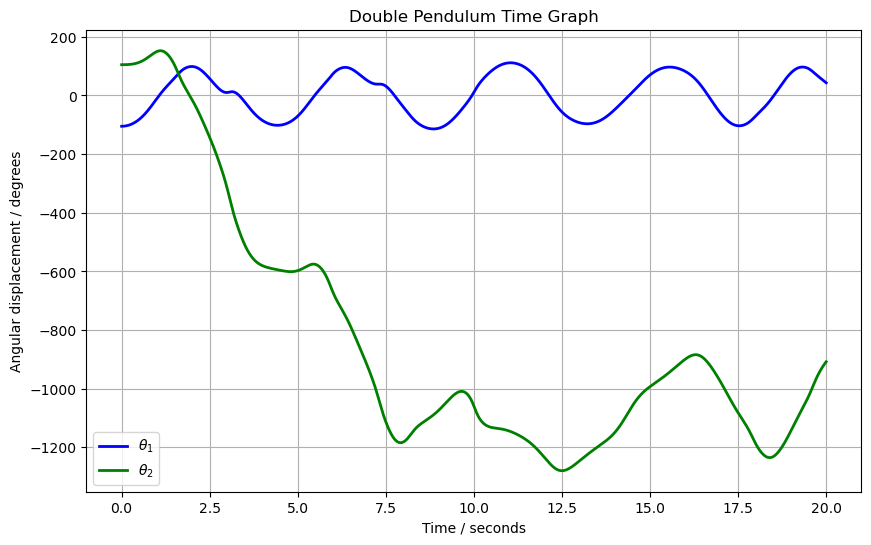

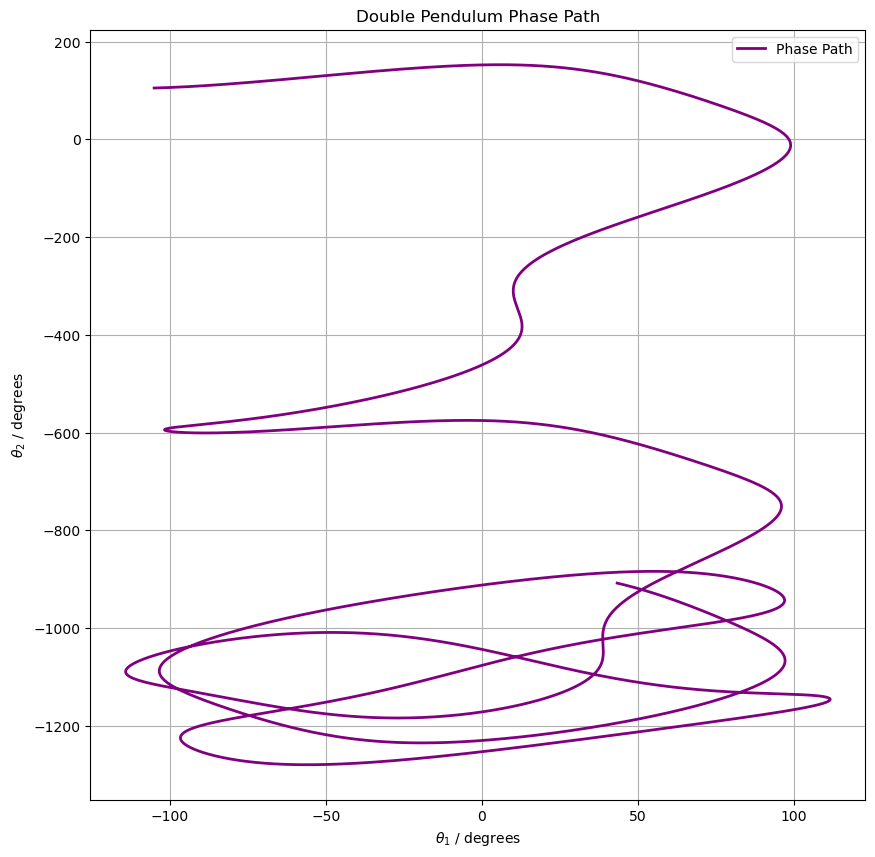

In [7]:
init_values = [-105, 105, 0, 0]
time = [0, 20, 4000]
pendulum6 = DoublePendulum(parameters=params, initial_conditions=init_values, time_vector=time)
pendulum6.time_graph()
pendulum6.phase_path()

In [9]:
pendulum6.precompute_positions()  # Precompute before the animation
fig = pendulum6.animate_pendulum(trace=True, appearance='dark')
#fig.show()

![img](Image_files/Moment_2.gif)

----
&nbsp;
## Interesting Normal Mode - Large initial $\theta_2$

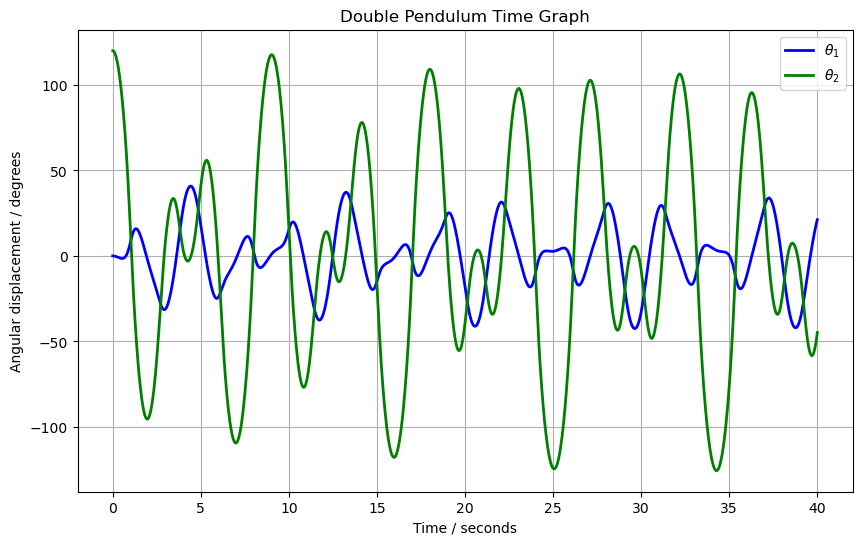

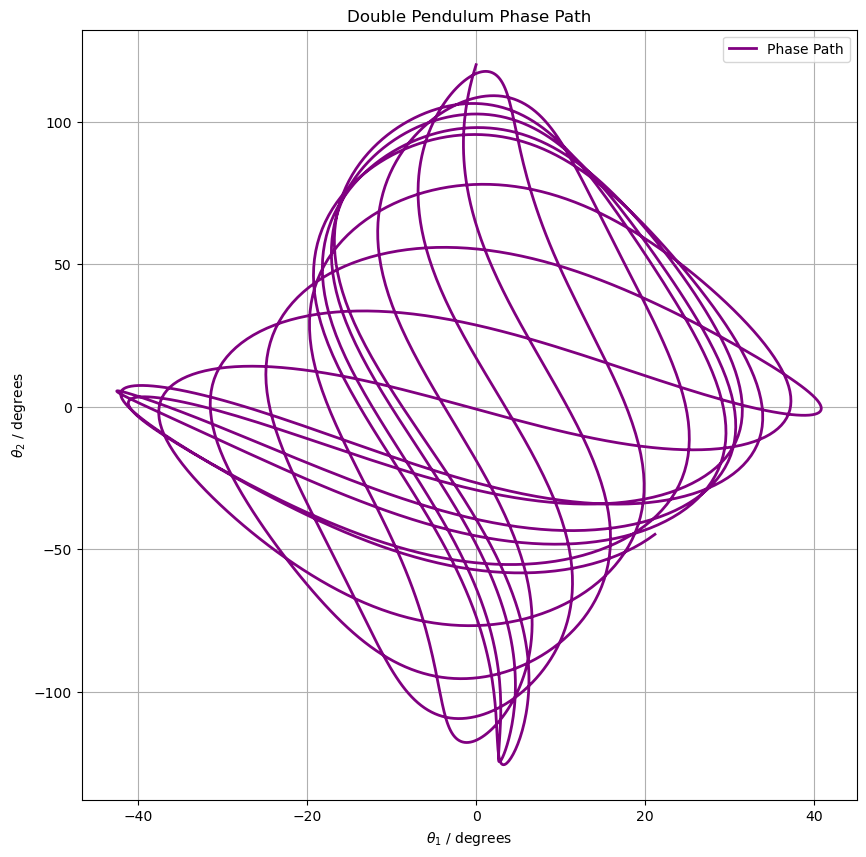

In [34]:
init_values = [0, 120, 0, 0]
time = [0, 40, 2000]
pendulum7 = DoublePendulum(parameters=params, initial_conditions=init_values, time_vector=time)
pendulum7.time_graph()
pendulum7.phase_path()